## Title: House Price Prediction)

In [2]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Taichun Chao

**Course:** CISD 43 – BIG DATA (Spring, 2024)

### Required packages

* Add instructions to install the required packages


In [6]:
## import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [7]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

## 1.Read and Clean data
- This set of data is pretty clean, it does not miss any number
- I modify the field name and drop the Address

In [11]:
#read the data
data = pd.read_csv("data/USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [13]:
#Check the missing numbers, or useingdata.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [15]:
# We want to compare the room, bedroom and price
# We don't need the address now, we remove the column of address
data = data.drop(["Address"], axis=1)
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06


In [17]:
#replace the the '.' to '' and " " tp '_', Ex. 'Avg. Area Income' to 'Avg Area Income',
# then replace again to 'Avg_Area_Income'
data.columns =data.columns.str.replace('.',"").str.replace(' ', '_')

data.describe() # to generate descriptive statistics for the data

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [19]:

# Round the decimal to 2
data = data.round(decimals=2)
data.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81
4,59982.20,5.04,7.84,4.23,26354.11,630943.49


## 2.Data visualization

#### Histogram chart to display each item distribuation

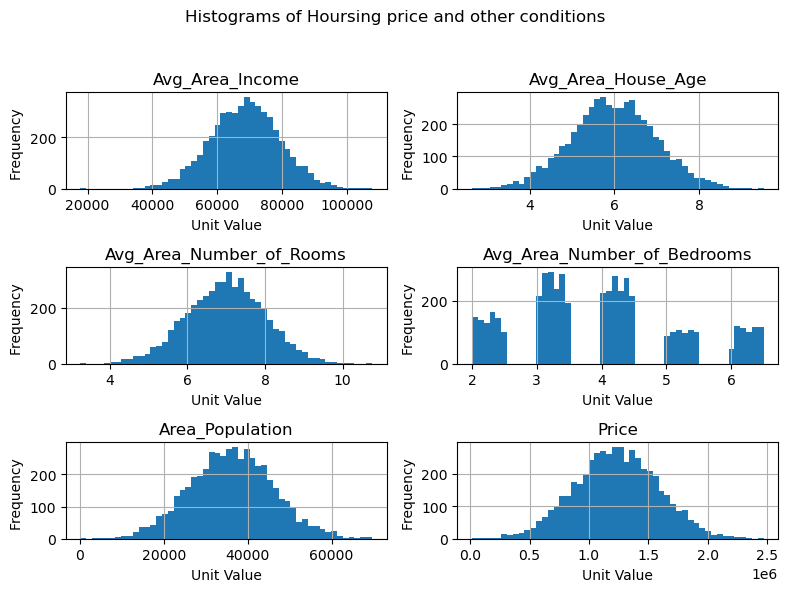

In [23]:
# Make a set of historgam chart- to see the distribution of each field
axes = data.hist(figsize=(8, 6), bins=50)

# Iterate over each subplot and set the titles
for ax in axes.flatten():
    ax.set_xlabel('Unit Value')
    ax.set_ylabel('Frequency ')

plt.suptitle('Histograms of Hoursing price and other conditions')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the padding to make room for the suptitle
plt.show()


#### Using Box to demo the relationship of Number of the bedroom with house price

<function matplotlib.pyplot.show(close=None, block=None)>

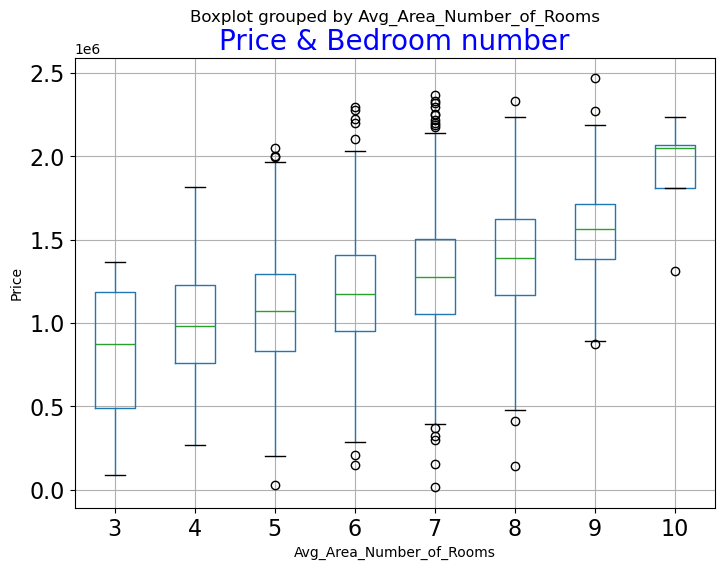

In [26]:
#Find th house price with bedroom number relationship
data = data.astype({"Avg_Area_Number_of_Rooms": int})
#sns.swarmplot(x='Avg_Area_Number_of_Rooms', y='Price', data=data, palette='rainbow')

data.boxplot(column="Price", by ='Avg_Area_Number_of_Rooms',figsize=(8,6), fontsize=16 )
plt.title("Price & Bedroom number", loc="center", color="blue",size =20)
plt.ylabel('Price')
plt.show

#### Display correlation with each item and prepare for heatmap 

In [29]:
# Visualization of the data correlation to each other with the heatmap Chart
ax = data.corr().round(2)
ax

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
Avg_Area_Income,1.00,-0.00,-0.01,0.02,-0.02,0.64
Avg_Area_House_Age,-0.00,1.00,-0.00,0.01,-0.02,0.45
Avg_Area_Number_of_Rooms,-0.01,-0.00,1.00,0.48,-0.00,0.33
Avg_Area_Number_of_Bedrooms,0.02,0.01,0.48,1.00,-0.02,0.17
Area_Population,-0.02,-0.02,-0.00,-0.02,1.00,0.41
Price,0.64,0.45,0.33,0.17,0.41,1.00


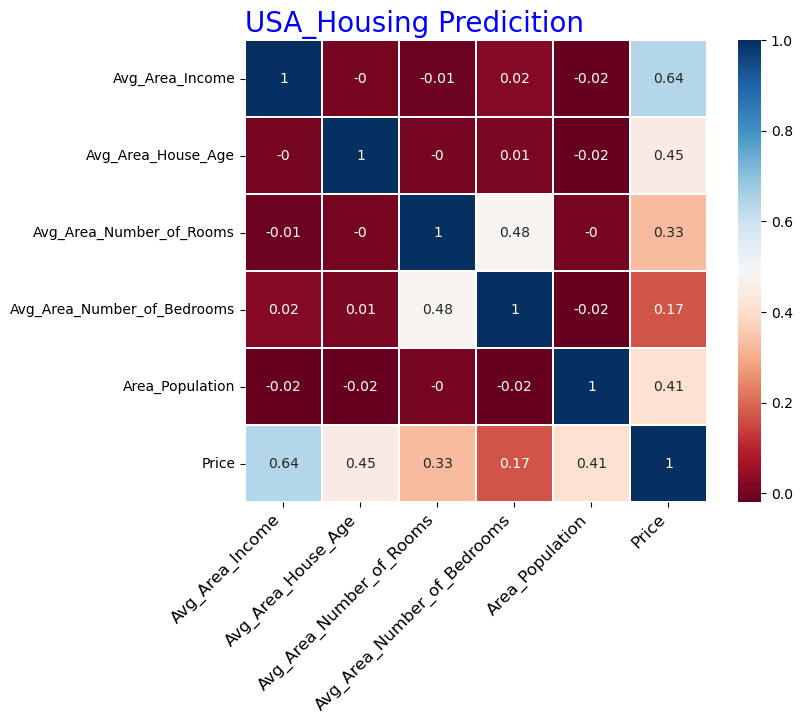

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(ax, annot = True, linewidth =.3, square=True,cmap='RdBu')
plt.xticks(fontsize=12, rotation=45,  ha='right')
plt.title("USA_Housing Predicition", loc="left", color="blue",size =20)
plt.show()

### Methodology

1. Explan your big data metodology
-  use pandas to load data, setup the DataFrame
-  use matlplotlib and seaborn for visualization chart
-  use sklearn import train_test_split, to split data from tranning and test data for machine learning
-  use linearRegression to check data linearity and correlation
-  use StandardScaler to classify data
-  use  KNeighborsClassifier for knn, classification_report, for knn report
-  use confusion_matrix, confusionmatrixDisplay for knn confusion matrix and display coefficient chart


2. Introduce the topics you used in your project
 * Model 1
   * Linear Regression
     - use the least of the sum of error of the squared root then divide the total, to get the best-fit line
     - This best fit-line x-axis is the actual value and y-axis is the predicted value
 * Model 2
    * KNN K-Nearest Neighbors: A non-labeling method used for classification and regression
    * by finding the closest train examples in the feature space (X)
      - use Euclidean Distance: to find the smallest line between two point
      - using the Standardization method to rescale the feature between 0 and 1 using mean and standard deviation

### Your code starts here

### Model 1 - Linear Regression


In [37]:
#1. look up the columns to set up the X and y array
data.columns

Index(['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms',
       'Avg_Area_Number_of_Bedrooms', 'Area_Population', 'Price'],
      dtype='object')

In [39]:
#2. import libray to get train_test_split
from sklearn.model_selection import train_test_split

# import the LinearRegression model
from sklearn.linear_model import LinearRegression

In [41]:
#3. setup the X, and y 
X = data.drop('Price', axis =1)
y = data['Price']

#Split the dataset in training-test (80: 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

#initializ the linear Regression model
model = LinearRegression()

# put the data to training in LinearRegression model
model.fit(X_train, y_train)

LinearRegression()

In [43]:
#Find the correlation coefficient between the price and each condition
model.coef_
coeff_df = pd.DataFrame(model.coef_, data.columns[:-1],columns=['Coefficient'] )
coeff_df.round(2)

,Coefficient
Avg_Area_Income,21.63
Avg_Area_House_Age,163430.74
Avg_Area_Number_of_Rooms,109347.66
Avg_Area_Number_of_Bedrooms,3070.67
Area_Population,15.26


In [45]:
#4predict the data split and classification result
y_pred = model.predict(X_test)

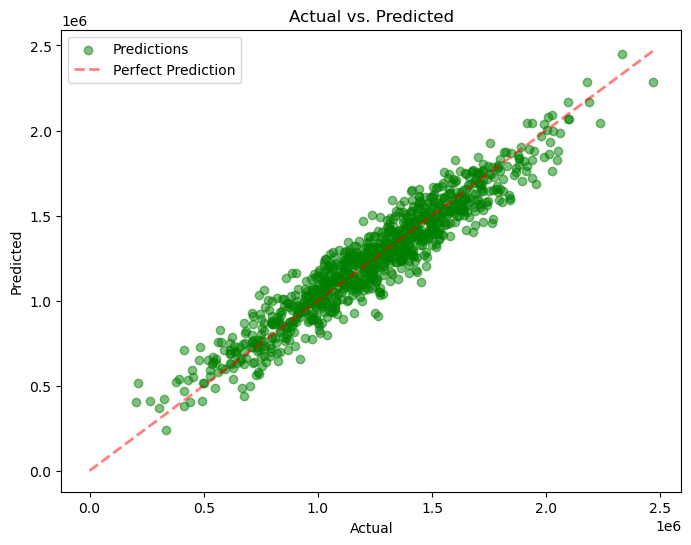

In [47]:
#5. Graaph the training and tst result
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color ='green',label='Predictions')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle ='dashed', 
              linewidth=2, markersize=12, alpha=0.5, label='Perfect Prediction')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

### Test values
#79248.642455	6.002900	6.730821	3.09	40173.072174	1.505891e+06	

In [50]:
#Predict House price with the number of the house we have
new_house_features = pd.DataFrame({
    'Avg_Area_Income': [79248.64],
    'Avg_Area_House_Age': [6.0],
    'Avg_Area_Number_of_Rooms': [6.73],
    'Avg_Area_Number_of_Bedrooms': [3.09],
    'Area_Population': [40173.07]})
y_pd = model.predict(new_house_features)
print('Predict house value: ', y_pd.round(2))

Predict house value:  [1550214.12]


### KNN Predicting method
#### Standardize the Variables
 -- **Using sklearn library to import StandardScaler**

In [53]:
#import library to standardize everything to the same scale
from sklearn.preprocessing import StandardScaler

# create an instance of the StandardScaler to make all the data between -1 ~1
scaler = StandardScaler()  # defult constructor with no arguments

In [55]:
# Set the "Price" as the Target, so we drop the 'Price" to let the rest of the data as the reference base
# This is only Standard Scaler, it does not have any output
scaler.fit(data)

StandardScaler()

In [57]:
# Transform the scaler object, centering and scaling the data, Transfer X data
#scaled_features = scaler.transform(data.drop('Price', axis =1))
scaled_features = scaler.transform(data)

In [59]:
#put a list of transform data to a dataframe
df_feature = pd.DataFrame(scaled_features, columns = data.columns)
df_feature.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price
0,1.028660,-0.299875,0.479175,0.088062,-1.317599,-0.490081
1,1.000808,0.022921,-0.473081,-0.722301,0.403999,0.775508
2,-0.684629,-0.108215,1.431431,0.930840,0.072410,-0.490211
3,-0.491499,1.223318,-1.425337,-0.584540,-0.186735,0.080843
4,-0.807072,-0.945467,0.479175,0.201513,-0.988387,-1.702518


#### Prepare X value and y values

In [62]:
#Prepare X values set
dfx = df_feature.drop('Price', axis =1 )
dfx.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population
0,1.028660,-0.299875,0.479175,0.088062,-1.317599
1,1.000808,0.022921,-0.473081,-0.722301,0.403999
2,-0.684629,-0.108215,1.431431,0.930840,0.072410
3,-0.491499,1.223318,-1.425337,-0.584540,-0.186735
4,-0.807072,-0.945467,0.479175,0.201513,-0.988387


In [64]:
# Find the Maximum and Minimnu number in  Modify ["Price"} column, We want to divide price in three section
M = max(df_feature['Price'])
N = min(df_feature['Price'])
Result = (M-N)/3
print(Result)

2.3159159956333872


In [66]:
#Prepare y value set
# Separate price in three different interval and put in a new column name ['PriceCategory']
result = []
for i in df_feature['Price'].to_numpy():
    if i > M-Result:
        result.append(1)
    elif i < N + Result: 
        result.append(-1)
    else:
        result.append(0)
# Change the list to dataFrame
dfy= pd.DataFrame(result, columns= ['PriceCategory']) 
dfy.head() # Check the new column to replace price

,PriceCategory
0,0
1,0
2,0
3,0
4,-1


### Feed the scaler to the KNN Machine Learning Algorithm
-- KNN is finding the number around the neighborhood
#### Train Test Split

In [69]:
#Import the required libraries
from sklearn.model_selection import train_test_split

In [71]:
#Training the data, set X as the feature Base data, and y as the Target class, or here is "Price" 
# X_train, X_text, y_train, y_test = train_test_split(df_feature, df['Price'], test_size=0.20, random_state=101 )
#usually the test_size= 0.2, and the random_state=n, n the number you pick up

X = dfx
y = dfy

#KNN Training model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                          test_size=0.20, random_state=101)

In [73]:
# Import KNeighborsClassifier, and report library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay


In [75]:
#Create an instance of KNeighborsClassifier, We set the number = 1 first
k = 5
knn = KNeighborsClassifier(n_neighbors =k, p =2) # p=2 euclidean Distance

#Call fit method for knn and pass the training data
knn.fit(X_train,y_train)

KNeighborsClassifier()


Classification report
               precision    recall  f1-score   support

          -1       0.82      0.70      0.76       115
           0       0.91      0.95      0.93       763
           1       0.81      0.69      0.74       122

    accuracy                           0.89      1000
   macro avg       0.85      0.78      0.81      1000
weighted avg       0.89      0.89      0.89      1000

Confusion Matrix: 
 [[ 81  34   0]
 [ 18 725  20]
 [  0  38  84]] 



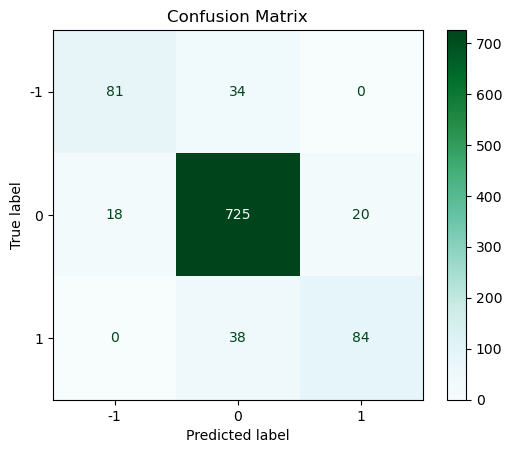

In [77]:
#use X values to get a y_prediction 
y_pred = knn.predict(X_test)
labels =[-1, 0, 1]  # I separate the price with -1, 0, and 1 as low, medium, and high
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

#KNN Predict report
print('\nClassification report\n',classification_report(y_test,y_pred))

# Making confusion matrix, and chart
print("Confusion Matrix: \n",cm, '\n')

disp.plot(cmap=plt.cm.BuGn)
plt.title('Confusion Matrix')
plt.show()


### Using the accuracy method to pick optimize k

Maximum accuracy:- 0.9 at K = 11


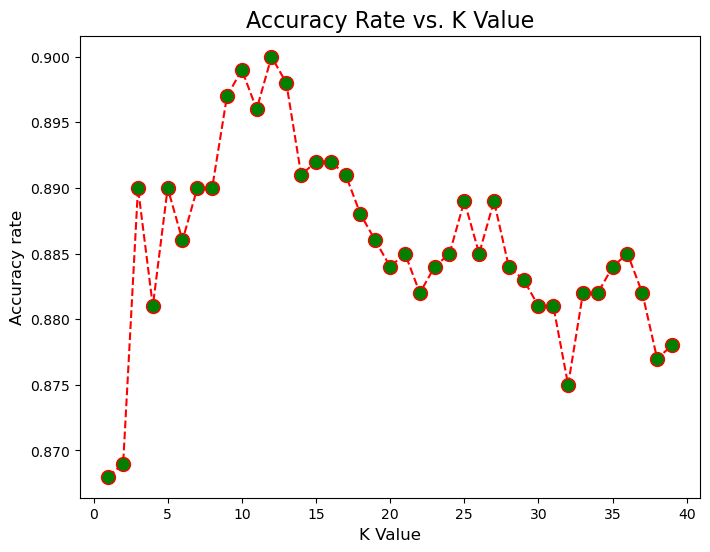

In [80]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(8,6))
plt.plot(range(1,40),acc,color = 'red',linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)

plt.title('Accuracy Rate vs. K Value', fontsize =16)
#add xlabel
plt.xlabel('K Value', fontsize=12)

#add ylabel
plt.ylabel('Accuracy rate', fontsize=12)

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
    

### Conclusions


* From the describe, the average price = 1.232073e+06 and the Max price = 2.469066e+06
* From the visualization boxplot, the highest price is for bedrooms 5, 6, 7, 8. There are not so many 10 bedrooms, and the price is not the highest
* From the correlation heatmap, the "income", "age of the house", "room of the house", and "population" direct the high house prices.
* From the linear Regression, I test my predicted formula, the price is growing up
* Hourse price is also related to the city, State, and location. Since I took out the address, the comparison was limited to room number, bedrooms, salary, and population. The output will be less accurate.


*  Linear Regression test: the new price is a little higher than the price it has before
*  The house pricing prediction K number needs to be around 11 other samples, the accuracy will be better


###  References
   - Academic (if any)
   - Online (if any)
     --https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#Distance%20Metrics

### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based The class example KNN_Classification Example 4 ( for loop to find k does not work)
> * Class example 6 to modify the ConfussionMatrixDisplay
>   
> * Medium web for linearRegression, accuracy to find k
> 

In [88]:
# End of Project